In [1]:
from exod.xmm.observation import Observation

In [3]:
obs = Observation('0886121001')

In [4]:
obs.get_files()

In [5]:
obs.inf

2024-02-15 16:16:17,231 - INFO - observation.py:info -      obsid : 0886121001
2024-02-15 16:16:17,234 - INFO - observation.py:info -  evt_raw_0 : P0886121001M2S002MIEVLI0000.FTZ
2024-02-15 16:16:17,235 - INFO - observation.py:info -  evt_raw_1 : P0886121001M1S001MIEVLI0000.FTZ
2024-02-15 16:16:17,236 - INFO - observation.py:info -  evt_raw_2 : P0886121001PNS003PIEVLI0000.FTZ
2024-02-15 16:16:17,237 - INFO - observation.py:info - evt_filt_0 : P0886121001M2S002MIEVLI0000_FILT.fits
2024-02-15 16:16:17,238 - INFO - observation.py:info - evt_filt_1 : P0886121001M1S001MIEVLI0000_FILT.fits
2024-02-15 16:16:17,239 - INFO - observation.py:info - evt_filt_2 : P0886121001PNS003PIEVLI0000_FILT.fits
2024-02-15 16:16:17,240 - INFO - observation.py:info -      img_0 : P0886121001M1S001MIEVLI0000_IMG.fits
2024-02-15 16:16:17,240 - INFO - observation.py:info -      img_1 : P0886121001M2S002MIEVLI0000_IMG.fits
2024-02-15 16:16:17,241 - INFO - observation.py:info -      img_2 : P0886121001PNS003PIEVLI00

{'obsid': '0886121001',
 'evt_raw_0': 'P0886121001M2S002MIEVLI0000.FTZ',
 'evt_raw_1': 'P0886121001M1S001MIEVLI0000.FTZ',
 'evt_raw_2': 'P0886121001PNS003PIEVLI0000.FTZ',
 'evt_filt_0': 'P0886121001M2S002MIEVLI0000_FILT.fits',
 'evt_filt_1': 'P0886121001M1S001MIEVLI0000_FILT.fits',
 'evt_filt_2': 'P0886121001PNS003PIEVLI0000_FILT.fits',
 'img_0': 'P0886121001M1S001MIEVLI0000_IMG.fits',
 'img_1': 'P0886121001M2S002MIEVLI0000_IMG.fits',
 'img_2': 'P0886121001PNS003PIEVLI0000_IMG.fits'}

In [7]:
evt = obs.events_processed_pn[0]

In [8]:
evt.read()

2024-02-15 16:16:56,071 - INFO - event_list.py:remove_bad_rows - Removing Bad PN Rows Struder et al. 2001b
2024-02-15 16:16:56,083 - INFO - event_list.py:remove_borders - Removing Borders: EPN PrimeFullWindow


In [10]:
from exod.pre_processing.data_loader import DataLoader

In [12]:
dl = DataLoader(evt)

In [14]:
data_cube = dl.create_data_cube()

2024-02-15 16:18:43,726 - INFO - data_loader.py:create_data_cube - Creating Data Cube...
2024-02-15 16:18:44,099 - INFO - data_cube.py:crop_data_cube - Cropping data cube between bbox_img: (40, 207, 64, 220)


In [19]:
data_cube.bti

AttributeError: 'DataCubeXMM' object has no attribute 'bti'

2024-02-15 16:20:13,221 - INFO - data_loader.py:get_high_energy_lc - min_energy_he = 10.0 max_energy_he = 12.0 time_interval_gti = 100
2024-02-15 16:20:13,224 - INFO - bti.py:get_bti - Curve Started Above threshold! (but did not end above it)
2024-02-15 16:20:13,273 - INFO - bti.py:plot_bti - saving bti plot to: /home/nkhan/EXOD2/data/results/0886121001/bti_plot.png
2024-02-15 16:20:13,630 - INFO - event_list.py:filter_by_energy - Filtering Events list by energy min_energy=0.2 max_energy=12.0
2024-02-15 16:20:13,637 - INFO - data_loader.py:create_data_cube - Creating Data Cube...
2024-02-15 16:20:14,004 - INFO - data_cube.py:crop_data_cube - Cropping data cube between bbox_img: (40, 207, 64, 220)
2024-02-15 16:20:14,005 - INFO - data_loader.py:mask_bti_from_data_cube - Masking bad frames from Data Cube (setting to nan)


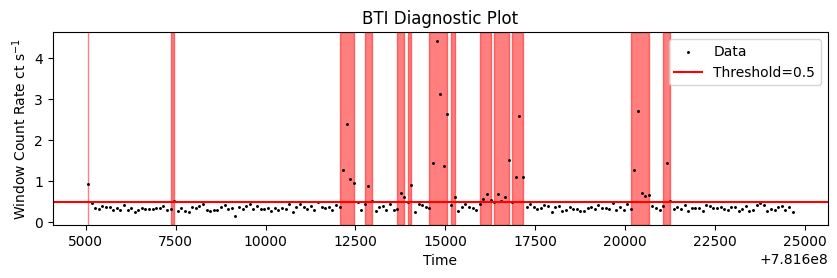

In [21]:
dl.run

In [24]:
from exod.processing.detector import Detector
from exod.xmm.event_list Event

In [29]:
obs.events_processed_pn

[EventList(/home/nkhan/EXOD2/data/processed/0886121001/P0886121001PNS003PIEVLI0000_FILT.fits)]

In [32]:
img = obs.images[2]
img.read(wcs_only=True)

/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/astropy/wcs/wcs.py:539: FITSFixedWarning: RADECSYS= 'FK5 ' / World coord. system for this file 
the RADECSYS keyword is deprecated, use RADESYSa.
  wcsprm = _wcs.Wcsprm(
/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '1998-01-01' from MJDREF.
Set MJD-OBS to 59860.354051 from DATE-OBS.
Set MJD-END to 59860.582778 from DATE-END'.
  warnings.warn(


In [34]:
det = Detector(data_cube, img.wcs)

2024-02-15 16:29:04,683 - INFO - detector.py:calc_image_var - Computing Variability
2024-02-15 16:29:04,806 - INFO - detector.py:extract_var_regions - Extracting variable Regions
2024-02-15 16:29:04,819 - INFO - detector.py:extract_var_regions - threshold: 0.9415363899947189 sigma: 4
2024-02-15 16:29:04,842 - WARNING - detector.py:get_regions_sky_position - Interpolating assuming a binning of 80 in the image file
2024-02-15 16:29:04,868 - INFO - detector.py:get_regions_sky_position - df_sky:
        x_img       y_img  ...      ra_deg    dec_deg
0  176.446651  400.494954  ...  267.905367 -27.984222
1  496.432815  402.075165  ...  267.502757 -27.982419
2  280.067240  330.889760  ...  267.775029 -28.061674
3  357.776062  487.876448  ...  267.677253 -27.887249
4  382.795367  465.359073  ...  267.645784 -27.912255

[5 rows x 8 columns]
2024-02-15 16:29:04,871 - INFO - detector.py:filter_df_regions - Removing regions with area_bbox > 12
2024-02-15 16:29:04,873 - INFO - detector.py:get_region

AttributeError: 'DataCubeXMM' object has no attribute 'rejected_frame_bool'

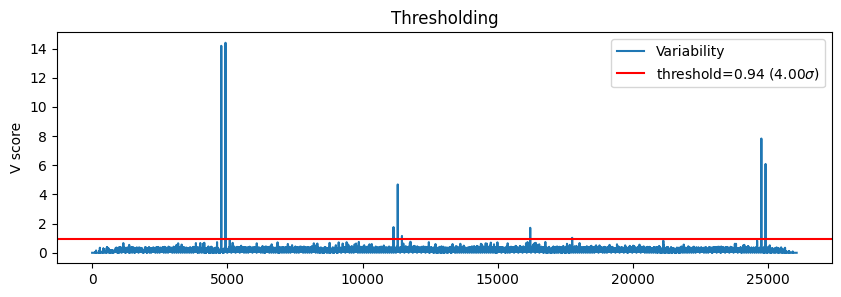

In [35]:
det.run()